# Dataset building


We build **the dataset** that will be useful to train the reward model and the final model.

<img src="project_plan.png"/>

## Conditions to be on the reward dataset
We decided on a few conditions for a sample to be in our reward dataset :
- Have a confidence level of 3, 4 or 5.
- The answers must have at least 3 phrases

## Preparing environment

In [2]:
from utils import (GPTQuerier, load_data, save_, format_json)
import numpy as np
import random
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
all_qas = load_data("interactions_v1.json")


ex_idxs = np.random.randint(0, len(all_qas), 5)
print("we have ", len(all_qas), " items")
print("Example of item : ")

[display(all_qas[i]) for i in ex_idxs];

we have  10835  items
Example of item : 


{'confidence': 1,
 'interaction': [{'role': 'system',
   'content': 'You will be given a question from the fields of mathematical analysis and linear algebra, written in French. Your task is to provide a clear, detailed, and accurate answer in English. Follow the guidelines below when crafting your response:\n1. Translate the question from French to English.\n2. Write mathematical formulas using LaTeX notation. Make sure that the answer has a correct latex syntax.\n3. Include step-by-step logical reasoning in your solution.\n4. Explicitly mention each property, lemma, proposition, or theorem used.\n5. Organize your reasoning as a numbered list of steps.\n6. Clearly state your final answer at the end, except if the question is a demonstration in which case there is nothing to add after the proof.\n7. If the question contains multiple sub-questions, then provide a justification for each sub-question.\n8. If the question contains multiple choices, then provide a justification for each cho

{'confidence': 4,
 'interaction': [{'role': 'system',
   'content': "You are a student passing an exam, you shall propose a complete and valid answer, explicite everything that seems necessary, do not give an answer out of nothing. Your answer should be clearand concise. Do not eloborate more than necessary. The reviewer of your exam is likely to be a teacher or a professor so you don't need to explain basic stuff. Beware, the question is given in Latex."},
  {'role': 'user',
   'content': 'Parmi les fonctions ci-dessous, déterminer celles qui sont dérivables, ou \ncontinûment dérivables sur \\(\\bR\\).\nf(x) = \\begin{cases} \\frac{\\sin(x-1)}{x-1}, & x\\neq 1\\\\\n0\\,, & x=1\n\\end{cases}\nf(x) = \n\\begin{cases} \nx\\sin(x)\\sin(\\frac{1}{x}), & x\\neq 0\\\\\n0\\,, & x=0\n\\end{cases}\nf(x) = \n\\begin{cases} \nx\\arctan(\\frac{1}{x}), & x\\neq 0\\\\\n0\\,, & x=0\n\\end{cases}\nf(x) = \n\\begin{cases} \nx^2\\arctan(\\frac{1}{x}), & x\\neq 0\\\\\n0\\,, & x= 0\n\\end{cases}\n'},
  {'

{'confidence': 4,
 'interaction': [{'role': 'system',
   'content': 'Select the correct answer and detail why you chose it'},
  {'role': 'user',
   'content': 'I am going to ask you a multiple choice question about Neuroscience, please give me a detailed and accurate answer, MCQ: Measurements of functional connectivity can be used to identify components in the human brain. What can these components be?\nChoices:\n1) Cell types\n2) Brain regions\n3) Brain networks\n4) Surface markers'},
  {'role': 'assistant',
   'content': 'The correct answer is 3) Brain networks. \n\nFunctional connectivity refers to the statistical association between the activities of different brain regions, and measurements of functional connectivity can be used to identify components in the human brain. These components are typically brain networks, which are collections of brain regions that are functionally connected and work together to perform specific cognitive and behavioral tasks. Brain networks can be ide

{'choices': ['The flow of current generated by a PSP in the dendrite diminishes with time',
  'The flow of current generated by a PSP in the dendrite is propagated with opening and closing of ions channels',
  'The flow of current generated by a PSP in the dendrite can be described as current in a 1-dimensional passive cable',
  'The flow of current generated by a PSP in the dendrite is time independent'],
 'question': 'What is the basic principle of Rall’s Cable Model?',
 'interaction': [{'role': 'system',
   'content': 'You are an AI bot that helps student understand the reasoning behind quiz problems to improve their learning experience, hence, you explain topics very exhaustively and understandibly.'},
  {'role': 'user',
   'content': "\n        We are required to answer the following question: \n\n        What is the basic principle of Rall’s Cable Model?\n\n        Exactly one of the following answers is right:\n        0: The flow of current generated by a PSP in the dendrite di

{'name': 'binary_multi_analyse_1_07-05-2023 13:41:07',
 'created_at': '2023-05-07 11:41:05',
 'model_type': 'chat_completion',
 'instruction_prefix': 'You are a math assistant whose main area of expertise is analysis.',
 'user_prefix': 'My request: ',
 'assistant_prefix': 'Your response: ',
 'confidence': 3,
 'interaction': [{'role': 'user',
   'content': '\nYour task is to decide, given multiple mathematical statements, whether they are correct or not.\n\nThe answer is intended for a first year university student studying mathematics,\nso you should give, for each answer, a justification of maximum 30 tokens.\nDo not rush the answer and give a justification for each statement. Answer in french\n\nThe question is given in french, and written in LaTeX, so you\'ll have to interpret it correctly. \n\nThe different statements are given between triple backticks.\n\nIf a statement is true, <bool> = "True", otherwise <bool> = "False". Determine the truth value of a statement\nindependently fr

In [3]:
nb_diff_questions = len({qa['sol_id'] for qa in all_qas})
print(f"In total we have {len(all_qas)} interactions with {nb_diff_questions} different questions")

In total we have 10835 interactions with 4450 different questions


In [4]:
confidences = [qa["confidence"] for qa in all_qas]
interaction_lens = [len(qa["interaction"]) for qa in all_qas]

## Distribution of confidence

Print some interactions with confidence level of 3 to see if it is cceptable or not. Looking at some samples it seems good answer to be $Y_+$ answers for our reward model 

In [15]:
random.sample([qa for qa in all_qas if qa["confidence"] ==3],5)

[{'choices': ['Increased aperture size',
   'Decreased aperture size',
   'Decreased miliampere-seconds (mAs)',
   'Increased filtration'],
  'question': 'Which of the following increases the signal-to-noise ratio of a CT image?',
  'interaction': [{'role': 'assistant',
    'content': 'The question is asking about which of the following options will increase the signal-to-noise ratio (SNR) of a CT image. The SNR is defined as the ratio of the signal strength to the noise level in an image. \n\nTheorem: The signal-to-noise ratio (SNR) of an image is directly proportional to the square root of the number of photons that are detected in the image.\n\nAnswer #1: "Increased aperture size" - False. Increasing the aperture size would allow more x-rays to pass through the patient, which would increase the number of detected photons and thus improve the SNR. However, increasing the aperture size would also increase the scatter radiation, which would increase the noise level and decrease the SNR

Text(0.5, 1.0, 'Distribution of the confidences among the interactions')

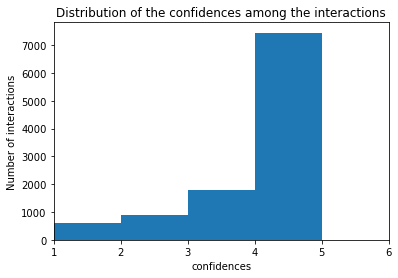

In [9]:
plt.hist(confidences, bins=[1, 2, 3, 4, 5])
plt.xlim((1, 6))
plt.xlabel("confidences")
plt.ylabel("Number of interactions")
plt.title("Distribution of the confidences among the interactions")

We fiilter the interaction for which the confidence is 3 or above.

In [5]:
## filter with confidence
secure_qas = [qa for qa in all_qas if qa["confidence"] > 2]

## Distribution of the number of interactions in the prompts

For our final model we want that given a prompt from a student, our model answers a good answer directly without the need of the user to interact multiple times with the model.
Therefore for our reward model, we want to compare big prompts between each other giving good score for weel explained answer and poor score for bad formated answers.
We therefore need to merge the generated answers into one big answer when we have multiple interactions in our dataset

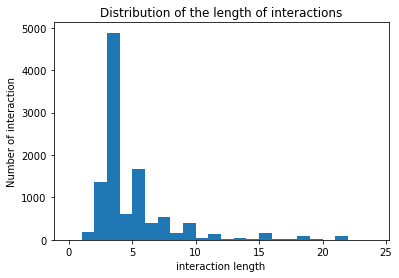

In [16]:
plt.hist(interaction_lens,bins=list(range(25)))
plt.xlabel("interaction length")
plt.ylabel("Number of interaction")
plt.title("Distribution of the length of interactions");

In [18]:
random.sample([qa for qa in all_qas if len(qa["interaction"]) ==6],5)

[{'confidence': 4,
  'interaction': [{'role': 'user',
    'content': 'When an operator reduces the SFOV (by changing physical opening of the CT gantry) for a particular body part...'},
   {'role': 'assistant', 'content': 'The displayed image appears larger'},
   {'role': 'assistant',
    'content': 'When the SFOV is reduced, the image appears larger because the same number of pixels are being used to display a smaller area. This results in a lower spatial resolution, but the image appears magnified. Conversely, when the SFOV is increased, the displayed image appears smaller because the same number of pixels are being used to display a larger area. This results in a higher spatial resolution, but the image appears shrunken.'},
   {'role': 'assistant',
    'content': 'A smaller number of detectors are activated.'},
   {'role': 'assistant',
    'content': 'When the SFOV is reduced, a smaller number of detectors are activated because only the detectors corresponding to the reduced area are

In [6]:
def user_question_generator(qas):
    for qa in qas:
        ulines = [line["content"] for line in  qa["interaction"] if line["role"] == "user"]
        if(len(ulines) == 0):
            yield "< No question >"
        else :
            ## perhaps sticking to simple (question ==> answer) interaction is preferrable
            yield ulines[0]


def assistant_answer_generator(qas):
    for qa in qas:
        ulines = [line["content"] for line in  qa["interaction"] if line["role"] == "assistant"]
        if(len(ulines) == 0):
            yield {'sol_id': qa['sol_id'], 'answer' : "< No answer >"}
        else :
            yield {'sol_id': qa['sol_id'], 'answer' : ulines[0]}

ds = zip(user_question_generator(all_qas), assistant_answer_generator(all_qas))
gen_answers = assistant_answer_generator(all_qas)
nb_sent_answers = [len(answers['answer'].split('.')) for answers in gen_answers]
gen_answers = assistant_answer_generator(all_qas)
nb_char_answers = [len(answers['answer']) for answers in gen_answers]

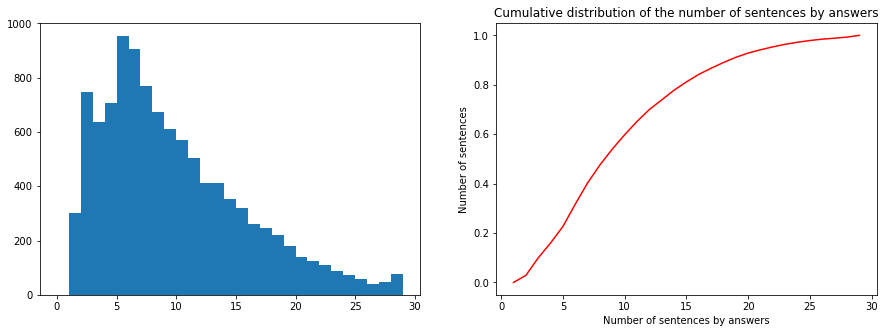

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
count, bins_count = np.histogram(nb_sent_answers,bins=list(range(30)))
ax1.hist(nb_sent_answers,bins=list(range(30)))
plt.xlabel("Number of sentences by answers")
plt.ylabel("Number of sentences")
plt.title("Cumulative distribution of the number of sentences by answers");
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
ax2.plot(bins_count[1:], cdf, color="red", label="CDF")


In [76]:
a = next(gen)
print(len(a.split('.')),a)

6 The main difference between light from a laser and a regular light bulb is coherence. Light from a laser is coherent, meaning that the light waves are all in phase with each other, traveling in the same direction, and at the same frequency. This creates a narrow, focused beam of light that can travel long distances without spreading out. Light from a regular light bulb, on the other hand, is incoherent, meaning that the light waves are not in phase with each other and are traveling in various directions, creating a broad, diffuse beam of light that spreads out quickly. Additionally, laser light is typically monochromatic, meaning that it is composed of a single color or wavelength, while light from a regular bulb is typically a broad spectrum of colors.


In [7]:
print("used portion : ", GPTQuerier.get_budget()["usage"] * 100 / GPTQuerier.get_budget()["limit"], "%") #before used portion :  2.0596733333333335 %

used portion :  4.641893333333333 %


## Save the answer we like and prepare the other for new generations

In [8]:
## filter with confidence and number of sentences
MINIMUM_CONFIDENCE = 3
MINIMUM_NUMBER_OF_SENTENCES = 6
MINIMUM_NUMBER_OF_CHARACTER = 500
secure_qas = [qa for i, qa in enumerate(all_qas) if qa["confidence"] >= MINIMUM_CONFIDENCE and
                                    nb_sent_answers[i] >= MINIMUM_NUMBER_OF_SENTENCES and
                                    nb_char_answers[i] >= MINIMUM_NUMBER_OF_CHARACTER]
qas_to_regenerate = [qa for i, qa in enumerate(all_qas) if qa["confidence"] < MINIMUM_CONFIDENCE or
                                    nb_sent_answers[i] < MINIMUM_NUMBER_OF_SENTENCES or
                                    nb_char_answers[i] < MINIMUM_NUMBER_OF_CHARACTER]
qa_ids_secure ={qa['sol_id'] for qa in secure_qas}
qa_ids_to_regenerate ={qa['sol_id'] for qa in qas_to_regenerate}
print(f"""We save {len(secure_qas)} sample that we save and we discard {len(qas_to_regenerate)} sample
Out of the discarded sample there are {len(qa_ids_to_regenerate)} different questions
And there are {len(qa_ids_to_regenerate- qa_ids_secure)} questions that were never answered""")

We save 6068 sample that we save and we discard 4767 sample
Out of the discarded sample there are 3045 different questions
And there are 942 questions that were never answered


## Generation of new samples
For the 942 non answered questions we regenerate 3 answers with our three techniques

For the others we regenerate an answer with our best prompting startegy.


In [4]:
solutions = load_data('data/solutions_v1.json')
generated = []
get_question_choices_from_id = {sol['sol_id'] :  {'question': sol['question'], 'choices' : sol['choices']if 'choices' in sol else None} for sol in solutions}

In [9]:
len(set([sol['sol_id'] for sol in solutions]))

4450

In [10]:
interactions = load_data('data/interactions_v1.json')

In [11]:
len(interactions)

10835

In [16]:
math_querier = GPTQuerier(technique = 'Mathieu')
anth_querier = GPTQuerier(technique = 'Antoine')
mehr_querier = GPTQuerier(technique = 'Mehron')
queriers = [math_querier, anth_querier, mehr_querier]

### Generation with the 3 queriers

In [17]:
need_3_gen_ids = qa_ids_to_regenerate- qa_ids_secure
samples_gen_3 = [sol for sol in solutions if sol['sol_id'] in need_3_gen_ids and len(sol['question'].split())<280]

In [19]:
for querier in queriers :
    print("New Querier")
    generated.extend(querier.multi_query(samples_gen_3, 3, already_started = True))

New Querier
New Querier
New Querier
  Query 670/932
  Query 680/932
  Query 690/932
  Query 700/932
  Query 710/932
  Query 720/932
  Query 730/932
  Query 740/932
  Query 750/932
  Query 760/932
  Query 770/932
  Query 780/932
Server timeout.
Retrying in 10 seconds...
  Query 790/932
  Query 800/932
  Query 810/932
  Query 820/932
  Query 830/932
  Query 840/932
  Query 850/932
  Query 860/932
  Query 870/932
  Query 880/932
  Query 890/932
  Query 900/932
  Query 910/932
  Query 920/932
  Query 930/932


### Generation with one querier for the rest

In [20]:
need_1_gen_ids = qa_ids_to_regenerate - (qa_ids_to_regenerate- qa_ids_secure)
samples_gen_1 = [sol for sol in solutions if sol['sol_id'] in need_1_gen_ids  and len(sol['question'].split())<280]
len(samples_gen_1)

2084

In [22]:
generated.extend(anth_querier.multi_query(samples_gen_1, 1,already_started = True))

  Query 2050/2084
  Query 2060/2084
  Query 2070/2084
  Query 2080/2084


### Get final $Y_+$ dataset
We want a tuple `(sol_id, question, choices, Y_+ answer)`

In [23]:
generated = []
for name in ['Mathieu', 'Antoine', 'Mehron'] :
    generated.extend(load_data(f"generated_{name}_3_save_conf_3_nb_sent_6.json"))
generated.extend(load_data(f"generated_Antoine_1_save_conf_3_nb_sent_6.json"))

In [24]:
all_good_gen = secure_qas + generated
gen_all_good_gen = assistant_answer_generator(all_good_gen)

In [25]:
all_good_gen_formated = [{
    'sol_id': g['sol_id'],
    'question' : get_question_choices_from_id[g['sol_id']]['question'],
    'choices' : get_question_choices_from_id[g['sol_id']]['choices'],
    'y_plus_answer' : g['answer']
} for g in gen_all_good_gen]

In [26]:
save_(all_good_gen_formated, "y_plus_dataset.json")

# Generate bad answers

**⚠️ Don't run this cell. Instructions for different levels have to be fine tuned before ⚠️**

In [ ]:
gpts = [GPTQuerier(level_bad=i) for i in range(5)]

reward_dataset = []
for (q, a) in ds:
    for gpt in gpts:
        reward_dataset.append({"question":q, "input_good":a, "input_bad": gpt.query(q)})

In [40]:
y_minus = load_data("NegativeAnswers_1000.json")

In [41]:
def format_y_minus(example) :
    start_chatGpt_answer = example['chat'].index('Assistant: ')
    example['chat'] = example['chat'][start_chatGpt_answer+11:]
    return example
# y_minus[0]['chat'].index('Assistant: ')

y_minus = [format_y_minus(sample) for sample in y_minus]
save_(y_minus, "NegativeAnswersFormatted_1000.json")

In [42]:
y_minus[0]

{'sol_id': 1693719,
 'lablel': 'Mathieu',
 'chat': 'The sensitivity of cone cells is $1/220$ of the rod cells. This means that for the same amount of light, cones need $220$ times more photons to be activated compared to rods. \n\nThe threshold values for rods are typically given as the number of photons needed to activate a rod cell, which is about $100$ photons. Thus, the threshold values for cone cells can be calculated as:\n\nThreshold values for cones $= 220 \\times 100 =$ 22,000 photons\n\nTherefore, for a cone cell to be activated, it needs to receive at least 22,000 photons. This is much higher than the threshold value for rods, which explains why rods are more sensitive to light but cannot register colors..'}

# Construct final dataset

In [44]:
y_plus = load_data(f"y_plus_dataset.json")
y_minus = load_data("NegativeAnswersFormatted_1000.json")

final = []
for y_p in y_plus :
    for y_m in y_minus :
        if y_p['sol_id'] == y_m['sol_id']:
            final.append({
    'sol_id': y_p['sol_id'],
    'question' : y_p['question'],
    'choices' : y_p['choices'],
    'y_plus_answer' : y_p['y_plus_answer'],
    'y_minus_answer' : y_m['chat']
})

In [53]:
206800/len(final)

80.0

In [51]:
save_(final, "reward_model_v1_1000_neg.json")

Saving the data :

In [ ]:
save_(ds, at="data/clean_data.json")
save_(reward_dataset, at="data/reward_dataset.json")